<div>
<a href="https://github.com/groupmm/edu_novfct"><img src="data/Edu_NovFct_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

<div>
<h2>Figure 3<br> <small>Novelty-based boundary detection for music structure analysis. </small></h2> </div>

This notebook provides code for reproducing the subfigures of Figure 3 of the paper.
- Figure 3a: Music signal (shown as waveform).
- Figure 3b: Annotation of local key segments and the musical form.
- Figure 3c: Chromagram.
- Figure 3d: Checkerboard kernel shown as 2D and 3D plot.
- Figure 3e: Self-similarity matrix.
- Figure 3g: Novelty function.

### Figure 3a
Audio recording of the Hungarian Dance No. 5 by Johannes Brahms.

<audio src="./data/example_Brahms_audio.mp3" type="audio/mpeg" controls="controls"></audio>

In the following code cell, we do the following:
* Import all necessary libraries and functions used in the notebook.
* Set the configurations for the figures.
* Plot the waveform of the audio excerpt (Figure 3a).


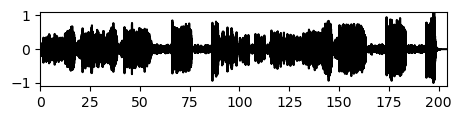

In [1]:
import numpy as np
import os, librosa
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import libfmp.b
import libfmp.c2
import libfmp.c3
import libfmp.c4
%matplotlib inline

### load audio wav and adjust amplitude
fn_wav = './data/example_Brahms_audio.wav'
Fs = 22050
x, Fs = librosa.load(fn_wav, Fs)
x_duration = len(x)/Fs
x = x*1.5

### Settings of the figures
export = False
figsize=(4.72,1.3)
figsize_ann= (5.2 ,0.42)
figsize_wav=(4.72,1.3)
figsize_colorbar=(5.36 ,1.8)
figsize_colorbar_sm=(5.36 ,4.6)
dpi = 100
tick_fonstize = 10
plot_xlim = [0, x_duration]
plot_ylim_wav = [-1.1, 1.1]

### Figure03a
libfmp.b.plot_signal(x, Fs, color='k', dpi=dpi, figsize=figsize_wav, xlabel='')
plt.yticks(fontsize=tick_fonstize)
plt.xticks(fontsize=tick_fonstize)
plt.xlim(plot_xlim)
plt.ylim(plot_ylim_wav)
plt.tight_layout()
output_path = os.path.join('./export/Figure03a.png')
if export == True:
    plt.savefig(output_path)


### Figure 3b

Annotation of local key segments and the musical form.

In the following code cells, we read and visualize the annotation of local key segments and the musical form (Figure 3b). 

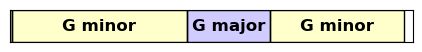

In [2]:
### Figure03b upper
# Plot Chord Annotations
fn_ann =  './data/example_Brahms_chord.csv'
ann, _ = libfmp.c4.read_structure_annotation(fn_ann)
### another way to set custom colors
color_ann ={'G minor': [1, 1, 0, 0.2], 
            'G major': [0.1, 0, 1, 0.2], 
            '': [1, 1, 1, 0]}


fig, ax = plt.subplots(1, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1]}, figsize=figsize_ann)   
libfmp.b.plot_segments(ann, ax=ax, time_max=x_duration, 
                       colors=color_ann, time_label='', dpi = dpi)
ax.set_xlim(plot_xlim)
ax.set_xticks([])
# plt.tight_layout()
output_path = os.path.join('./export/Figure03b-up.png')
if export == True:
    plt.savefig(output_path)
    

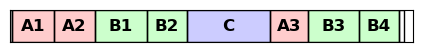

In [3]:
### Figure03b bottm
### Plot Structure Annotations
fn_ann = './data/example_Brahms_ann.csv'
ann, color_ann = libfmp.c4.read_structure_annotation(fn_ann)
color_ann = {'A1': [1, 0, 0, 0.2], 'A2': [1, 0, 0, 0.2], 'A3': [1, 0, 0, 0.2], 
             'B1': [0, 1, 0, 0.2], 'B2': [0, 1, 0, 0.2], 'B3': [0, 1, 0, 0.2], 
             'B4': [0, 1, 0, 0.2], 'C': [0, 0, 1, 0.2], '': [1, 1, 1, 0]}
 
fig, ax = plt.subplots(1, 1, figsize=figsize_ann)   
libfmp.b.plot_segments(ann, ax=ax, time_max=x_duration, 
                       colors=color_ann, time_label='', dpi = dpi)
ax.set_xlim(plot_xlim)
ax.set_xticks([])
# plt.tight_layout()
output_path = os.path.join('./export/Figure03b-bottom.png')
if export == True:
    plt.savefig(output_path)

### Figure 3c

Chromagram.

In the following code cell, we utlize libfmp to calculate STFT-based chroma feature, downsample, smooth the feature, and visualize the chromagram.

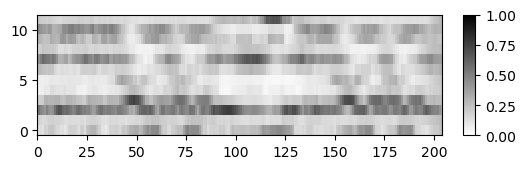

In [4]:
### Figure03c
### Plot chromagram
# Chroma Feature Sequence (10 Hz)
C = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=2, hop_length=2205, n_fft=4410)
Fs_C = Fs / 2205

# Smoothing and normalization
X, Fs_X = libfmp.c3.smooth_downsample_feature_sequence(C, Fs_C, filt_len=81, down_sampling=10)
X = libfmp.c3.normalize_feature_sequence(X, norm='2', threshold=0.001)

## chromagram
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 0.03], 'height_ratios': [1]}, figsize=figsize_colorbar, dpi=dpi)
libfmp.b.plot_matrix(X, Fs=Fs_X, ax=[ax[0], ax[1]], title='', xlabel='', ylabel='', clim  = [0, 1])
ax[0].tick_params(axis='both', which='major', labelsize=tick_fonstize)
ax[1].tick_params(axis='both', which='major', labelsize=tick_fonstize)
ax[0].set_xlim(plot_xlim)

plt.tight_layout()
output_path = os.path.join('./export/Figure03c.png')
if export == True:
    plt.savefig(output_path)


### Figure 3d

Checkerboard kernel shown as 2D and 3D plot.

In the following code cell, we calculate and visualize the Gaussian checkerboard kernel as 2D and 3D plot.

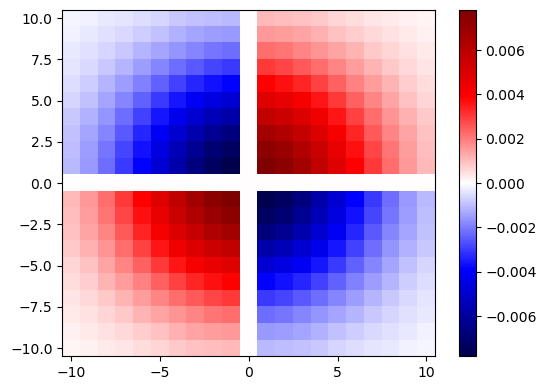

In [5]:
### Figure03d left
### Plot checkerboard gaussian kernel
def compute_kernel_checkerboard_gaussian(L, var=1, normalize=True):
    """Compute Guassian-like checkerboard kernel [FMP, Section 4.4.1].
    See also: https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/

    Notebook: C4/C4S4_NoveltySegmentation.ipynb

    Args:
        L (int): Parameter specifying the kernel size M=2*L+1
        var (float): Variance parameter determing the tapering (epsilon) (Default value = 1.0)
        normalize (bool): Normalize kernel (Default value = True)

    Returns:
        kernel (np.ndarray): Kernel matrix of size M x M
    """
    taper = np.sqrt(1/2) / (L * var)
    axis = np.arange(-L, L+1)
    gaussian1D = np.exp(-taper**2 * (axis**2))
    gaussian2D = np.outer(gaussian1D, gaussian1D)
    kernel_box = np.outer(np.sign(axis), np.sign(axis))
    kernel = kernel_box * gaussian2D
    if normalize:
        kernel = kernel / np.sum(np.abs(kernel))
    return kernel

L = 10
var = 0.5
tick_fontsize = 10
kernel = compute_kernel_checkerboard_gaussian(L, var)
plt.figure(figsize = (5.6,4))
im = plt.imshow(kernel, aspect='auto', origin='lower', 
           extent=[-L-0.5,L+0.5,-L-0.5,L+0.5], cmap='seismic')
plt.yticks(fontsize=tick_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.colorbar()
im.figure.axes[1].tick_params( labelsize=tick_fontsize) 
plt.tight_layout()
output_path = os.path.join('./export/Figure03d-left.png')
if export == True:
    plt.savefig(output_path)

/tmp/ipykernel_3070293/2207979434.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  interval = np.complex(2*L+1)


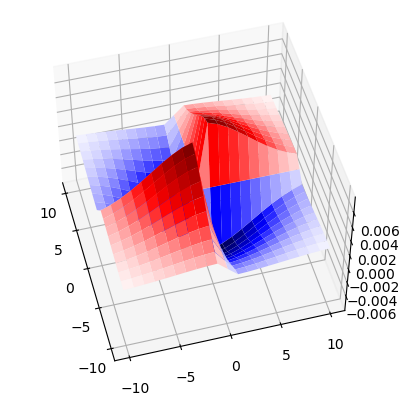

In [6]:
### Figure03d right
### Plot 3D Gaussian kernel
interval = np.complex(2*L+1)
ax = plt.figure(figsize = (5.2,4) ).add_subplot(projection='3d')
X, Y = np.mgrid[-L:L:interval, -L:L:interval]
cmap='seismic'

ax.plot_surface(X , Y , kernel, cmap=cmap, )
ax.tick_params(axis='both', labelsize=tick_fontsize)
rotate = (-130, 15)
ax.view_init(rotate[0], rotate[1])
ax.invert_zaxis()

plt.tight_layout()
output_path = os.path.join('./export/Figure03d-right.png'.format(L, rotate[0], rotate[1]))
if export == True:
    plt.savefig(output_path)

### Figure 3e

Self-similarity matrix.

In the following code cell, we utlize libfmp to calculate self-similarity matrix based on STFT-based chroma feature.

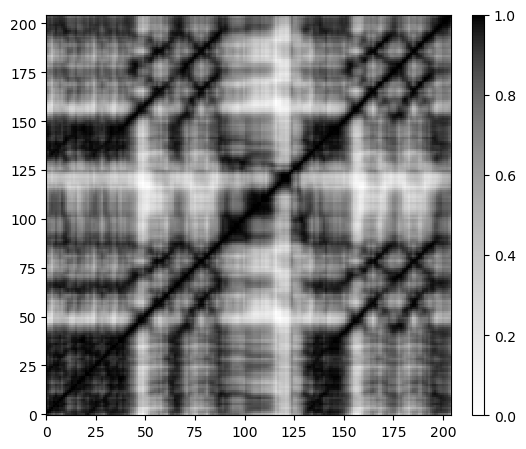

In [7]:
### Figure03e 
### Plot Self-similarity matrix
x, x_duration, X, Fs_X, S, I = libfmp.c4.compute_sm_from_filename(fn_wav, 
                                                L=81, H=10, L_smooth=1, thresh=1)
### Adjusting the color scale of colorbar
cmap = libfmp.b.compressed_gray_cmap(alpha=-5)
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 0.03], 'height_ratios': [1]}, 
                       figsize=figsize_colorbar_sm, dpi=dpi)
libfmp.b.plot_matrix(S, Fs=Fs_X, ax=[ax[0], ax[1]], title='', xlabel='', ylabel='', clim  = [0, 1], 
                    cmap = cmap, )
ax[0].tick_params(axis='both', which='major', labelsize=tick_fonstize)
ax[0].set_xlim(plot_xlim)
plt.tight_layout()
output_path = os.path.join('./export/Figure03e.png')
if export == True:
    plt.savefig(output_path)

### Figure 3g

Novelty function.

In the following code cell, we compute the novelty function via shifting the Gaussian kernel along the main diagonal of the SSM.

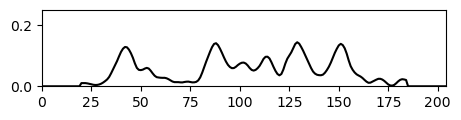

In [8]:
### Figure03g
def compute_novelty_ssm(S, kernel=None, L=10, var=0.5, exclude=False):
    """Compute novelty function from SSM [FMP, Section 4.4.1]

    Notebook: C4/C4S4_NoveltySegmentation.ipynb

    Args:
        S (np.ndarray): SSM
        kernel (np.ndarray): Checkerboard kernel (if kernel==None, it will be computed) (Default value = None)
        L (int): Parameter specifying the kernel size M=2*L+1 (Default value = 10)
        var (float): Variance parameter determing the tapering (epsilon) (Default value = 0.5)
        exclude (bool): Sets the first L and last L values of novelty function to zero (Default value = False)

    Returns:
        nov (np.ndarray): Novelty function
    """
    if kernel is None:
        kernel = compute_kernel_checkerboard_gaussian(L=L, var=var)
    N = S.shape[0]
    M = 2*L + 1
    nov = np.zeros(N)
    # np.pad does not work with numba/jit
    S_padded = np.pad(S, L, mode='constant')

    for n in range(N):
        nov[n] = np.sum(S_padded[n:n+M, n:n+M] * kernel)
    if exclude:
        right = np.min([L, N])
        left = np.max([0, N-L])
        nov[0:right] = 0
        nov[left:N] = 0

    return nov

L_kernel = 20
### Add zero-padding to avoid boundary effect in the beginning: exclude = True
nov = compute_novelty_ssm(S, L=L_kernel, exclude=True)   
fig, ax, line = libfmp.b.plot_signal(nov, Fs = Fs_X, color='k', xlabel='', dpi=dpi,  figsize=figsize)  
ax.tick_params(axis='both', which='major', labelsize=tick_fonstize)
ax.set_xlim([0, x_duration])
ax.set_ylim([0, 0.25])
output_path = os.path.join('./export/Figure03g.png')
if export == True:
    plt.savefig(output_path)

### Further Notes and Links
<ul>
<li><span style="color:black">
Meinard Müller and Ching-Yu Chiu: <a href="https://ieeexplore.ieee.org/document/6353546"><strong>A Basic Tutorial on Novelty and Activation Functions for Music Signal Processing.</strong></a> Transaction of the International Society for Music Information Retrieval (TISMIR), ??: ??–??, 2024. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="./data/bibtex_MuellerC24_EduNovFct_TISMIR.txt"> Bibtex </a>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="https://github.com/groupmm/edu_novfct">GitHub</a></span></li>
</ul> 

* In the [FMP notebook on novelty-based segmentation](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C4/C4S4_NoveltySegmentation.html), one finds a detailed introduction to novelty-based segmentation.

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data/Edu_NovFct_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>